In [1]:
import numpy as np
from numpy.random import randn
import pandas as pd
from scipy import stats
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
%matplotlib inline

In [2]:
dataset = randn(25)

(0, 1)

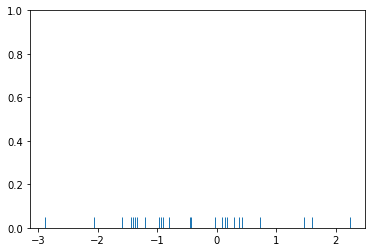

In [3]:
sns.rugplot(dataset)
plt.ylim(0,1)

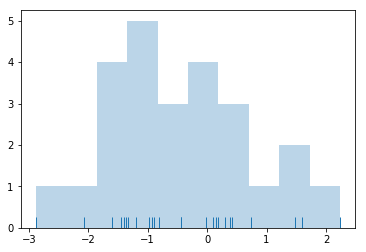

In [4]:
plt.hist(dataset, alpha=0.3)
sns.rugplot(dataset)

(0, 1)

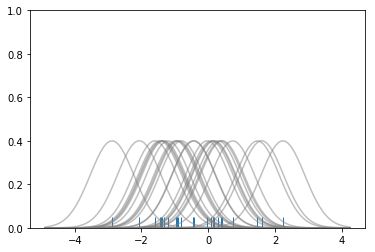

In [5]:
sns.rugplot(dataset)
x_min = dataset.min() - 2
x_max = dataset.max() + 2
x_axis = np.linspace(x_min, x_max, 100)
bandwidth = ((4*dataset.std()**5) / (3*len(dataset))) ** 0.2
kernel_list = []

for data_point in dataset:
    # Create a kernel for each point and append to kernel list
    kernel = stats.norm(data_point, bandwidth).pdf(x_axis)
    kernel_list.append(kernel)
    
    # Scale for plotting
    kernel = kernel / kernel.max()
    kernel = kernel * 0.4
    
    plt.plot(x_axis, kernel, color='grey', alpha=0.5)
    
plt.ylim(0,1)

Text(0.5,0.98,'Sum of the basis functions')

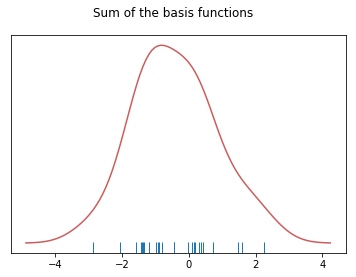

In [6]:
sum_of_kde = np.sum(kernel_list, axis=0)
fig = plt.plot(x_axis, sum_of_kde, color='indianred')
sns.rugplot(dataset)
plt.yticks([])
plt.suptitle("Sum of the basis functions")

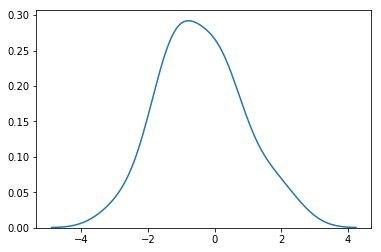

In [7]:
sns.kdeplot(dataset)

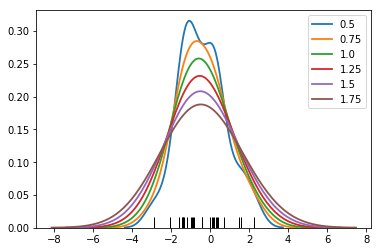

In [8]:
sns.rugplot(dataset, color='black')

for bw in np.arange(0.5, 2, .25):
    sns.kdeplot(dataset, bw=bw, lw=1.8, label=bw)
    

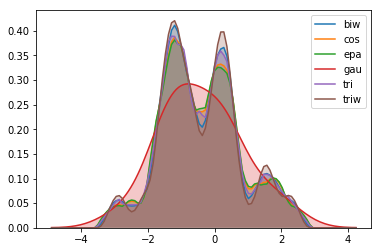

In [9]:
kernel_options = ['biw', 'cos', 'epa', 'gau', 'tri', 'triw']
for kern in kernel_options:
   sns.kdeplot(dataset, kernel = kern, label=kern, shade=True)

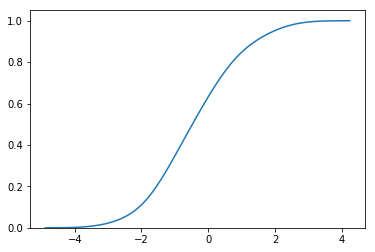

In [10]:
sns.kdeplot(dataset, cumulative=True)

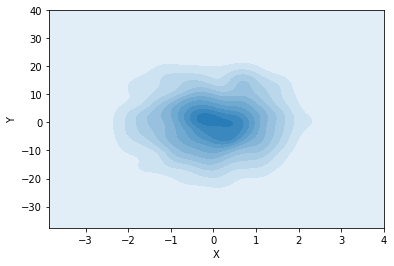

In [15]:
mean = [0,0]
cov = [[1,0],[0,100]]
dataset2 = np.random.multivariate_normal(mean, cov, 1000)
dframe = pd.DataFrame(dataset2, columns=['X','Y'])
sns.kdeplot(dframe.X ,dframe.Y, shade=True)

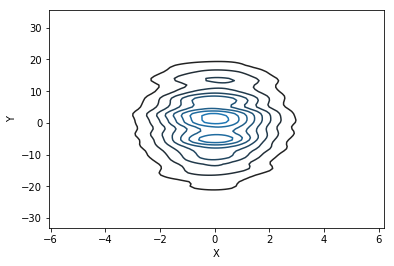

In [17]:
sns.kdeplot(dframe.X, dframe.Y, bw=1)

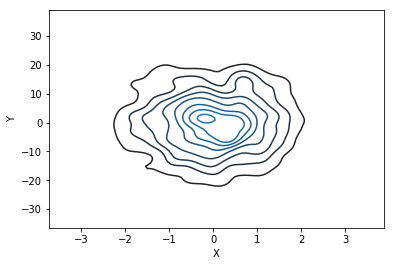

In [18]:
sns.kdeplot(dframe.X, dframe.Y, bw='silverman')

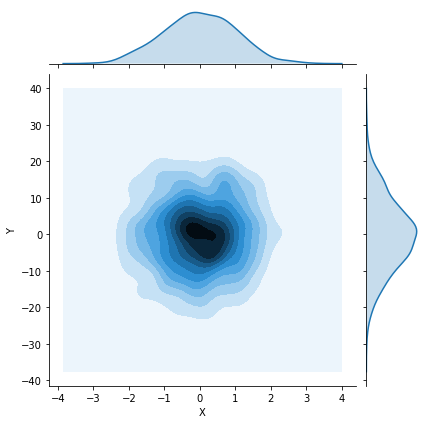

In [19]:
sns.jointplot('X', 'Y', dframe, kind='kde')